In [36]:
import duckdb
import seaborn as sns
import pandas as pd

In [66]:
database = duckdb.connect("database/database_pi.db")

query = """
SELECT
    Atendimentos,
    Idade_paciente,
    doenca
FROM (
	SELECT Count(*) AS Atendimentos, p.idadepac AS Idade_paciente, Any_value(cid.CD_DESCR) AS doenca, ROW_NUMBER() OVER (PARTITION BY Idade_paciente ORDER BY COUNT(*) DESC) AS rn
	FROM main.psicossocial AS p
	INNER JOIN main.s_cid AS cid ON cid.CD_COD = p.cidpri 
	WHERE p.ufmun = '431020'
	GROUP BY p.idadepac, p.cidpri 
	ORDER BY p.idadepac, Atendimentos
	desc
) ranked
WHERE
    rn <= 1
"""

rows = database.query(query).fetchall()

In [68]:
dataframe = pd.DataFrame(rows)
# dataframe.columns = ["Tipos", "Casos"]
dataframe.sort_values(by=1, ascending=True, inplace=True)

print(dataframe)

       0   1                                                  2
0   1057  00                         F41   Outr transt ansiosos
1    254  01                         F41   Outr transt ansiosos
2    425  02                         F41   Outr transt ansiosos
3    835  03                         F41   Outr transt ansiosos
4   1008  04                         F41   Outr transt ansiosos
..   ...  ..                                                ...
84    12  85               F99   Transt mental NE em outr parte
85     3  86                       F32.9 Episodio depressivo NE
86     3  87                       F32.9 Episodio depressivo NE
87     1  88  Z01   Outr exam invest esp pess s/queix diag r...
88     4  97        F10   Transt mentais comport dev uso alcool

[89 rows x 3 columns]


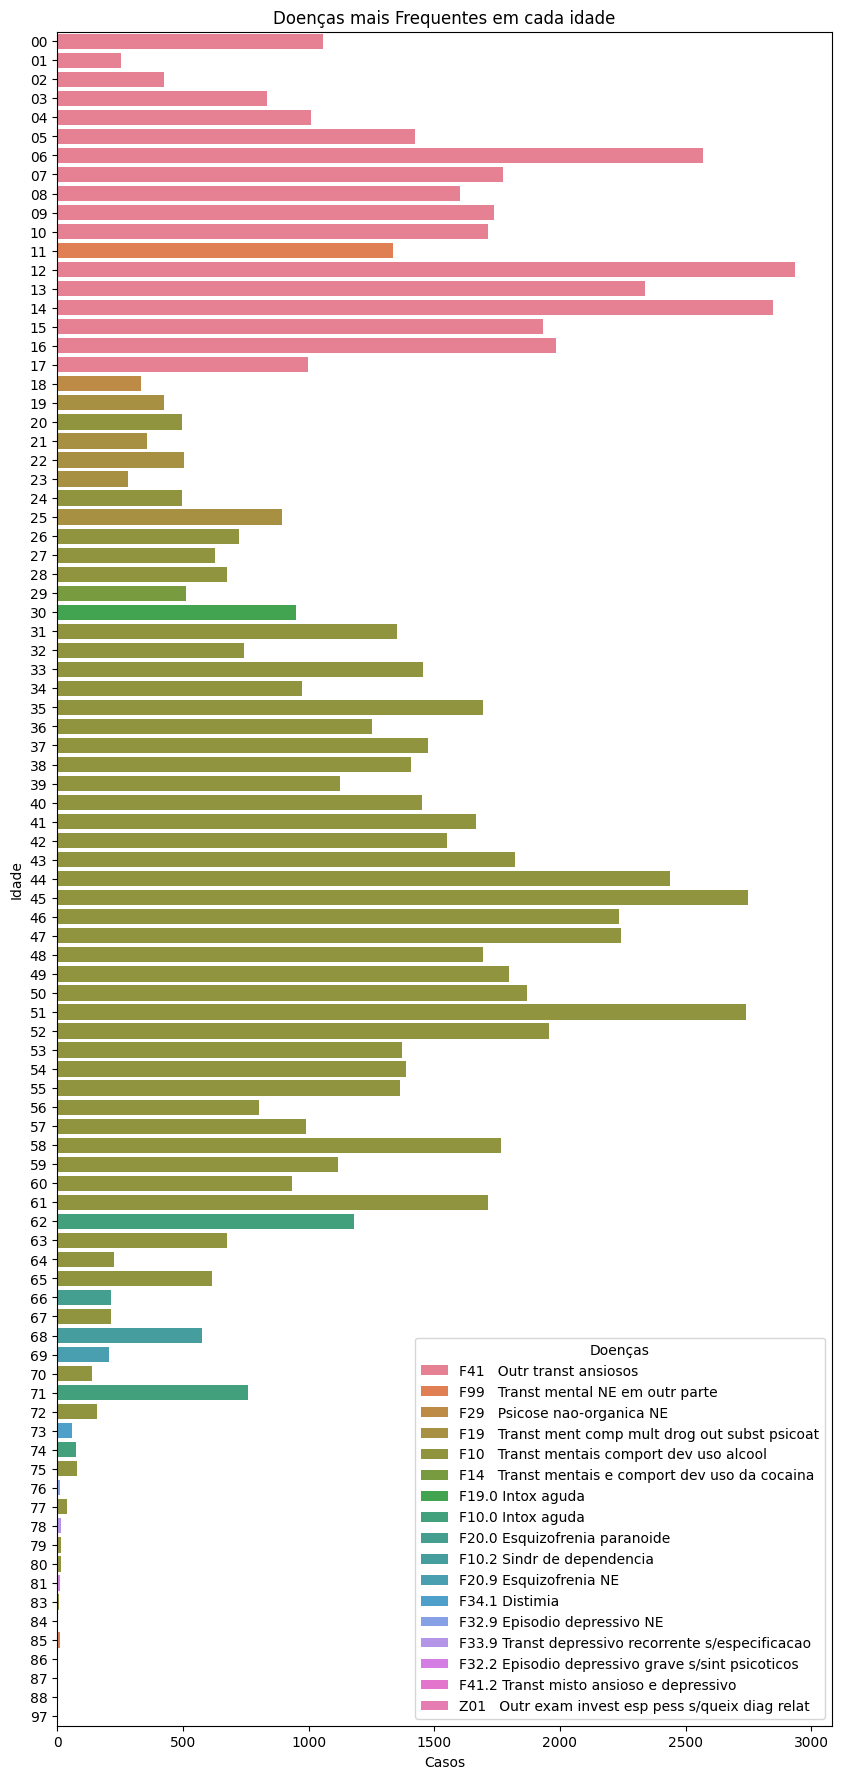

In [80]:
import matplotlib.pyplot as plt

x=0
y=1
hue=2

plt.figure(figsize=(10, 22))
plt.xlabel("Casos")
plt.ylabel("Idade")
plt.title("Doenças mais Frequentes em cada idade")
sns.barplot(dataframe, x=x, y=y, hue=hue)
# plt.pie(dataframe[y], labels=dataframe[x], autopct='%1.1f%%', startangle=140)
plt.legend(loc="lower right", title="Doenças")
